In [6]:
import math

# following the pseudo-code provided in class
def FFT(x):
    n = len(x)

    if n == 1:
        return x  # base case

    else:
        even_fft = FFT(x[::2])
        odd_fft = FFT(x[1::2])

        # combine the results using twiddle factors
        combine_fft = [0] * n
    
        for k in range(n//2):
            factor = complex(math.cos(2 * math.pi * k / n), - math.sin(2 * math.pi * k / n))
            combine_fft[k] = even_fft[k] + factor * odd_fft[k]
            combine_fft[k + n//2] = even_fft[k] - factor * odd_fft[k]

        return combine_fft

n = 4 # for example
N = 2**n

# f[k] = 1 for N/4 < k <= 3N/4 and f[k] = 0 elsewhere
input_signal = [0] * N
for k in range(N//4, 3*N//4):
    input_signal[k] = 1

# Compute the FFT
result = FFT(input_signal)

print("Input signal:", input_signal)
print("Output signal:", result)


Input signal: [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
Output signal: [(8+0j), (-5.027339492125848-1.0000000000000004j), 0j, (1.496605762665489+1.0000000000000002j), 0j, (-0.6681786379192988-0.9999999999999999j), 0j, (0.19891236737965778+1j), 0j, (0.19891236737965823-1j), 0j, (-0.6681786379192991+0.9999999999999998j), 0j, (1.4966057626654887-0.9999999999999997j), 0j, (-5.027339492125847+0.9999999999999997j)]


[8.0, 5.125830895483013, 0.0, 1.7999524462728314, 0.0, 1.2026897738700904, 0.0, 1.0195911582083184, 0.0, 1.0195911582083184, 0.0, 1.2026897738700906, 0.0, 1.7999524462728311, 0.0, 5.125830895483012]


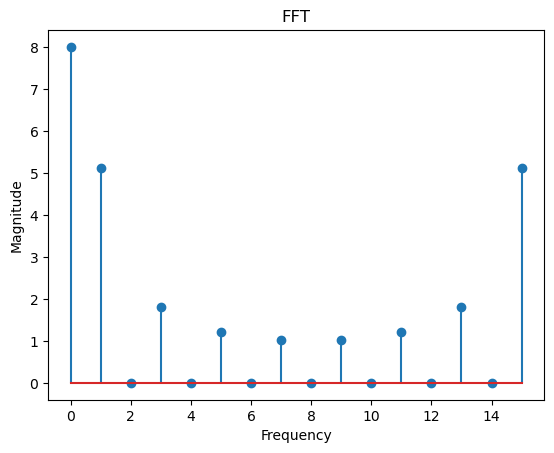

In [8]:
# plot
import matplotlib.pyplot as plt

freq = [n for n in range(N)]
magn = [abs(x) for x in result]
plt.stem(freq, magn)
plt.title("FFT")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()